## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the cleaned data

In [2]:
consumption = pd.read_csv('../cleaned_data/consumption.csv',index_col='country')
generation_renewable = pd.read_csv('../cleaned_data/generation_renewable.csv',index_col='country')
generation_norenewable = pd.read_csv('../cleaned_data/generation_fossil.csv',index_col='country')
installations_renewable = pd.read_csv('../cleaned_data/capacity_renewable.csv',index_col='country')
installations_norenewable = pd.read_csv('../cleaned_data/capacity_fossil.csv',index_col='country')
imports = pd.read_csv('../cleaned_data/imports.csv',index_col='country')
exports = pd.read_csv('../cleaned_data/exports.csv',index_col='country')
population = pd.read_csv('../cleaned_data/population.csv',index_col='country')


# 1.Evolution of  countries in renewable energy consumption.

## Plot some important countries as function of:

**Consumption**

**Generation Renewable**

**Generation Fossile**

**Capacity(installations) Renewable**

**Capacity(installations) Fossile**

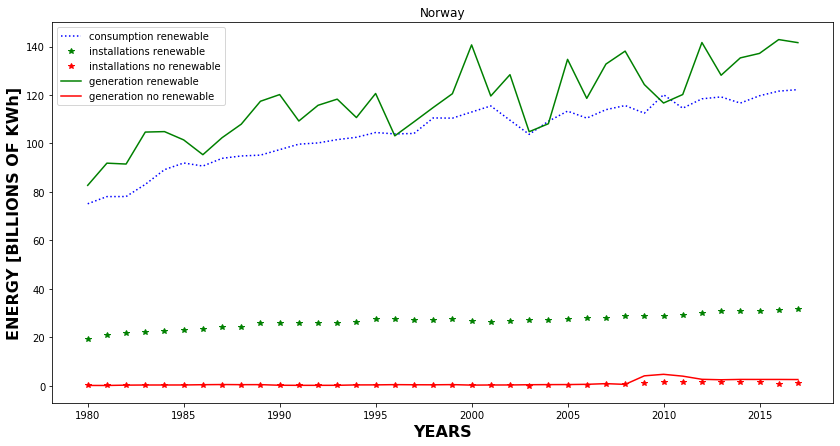

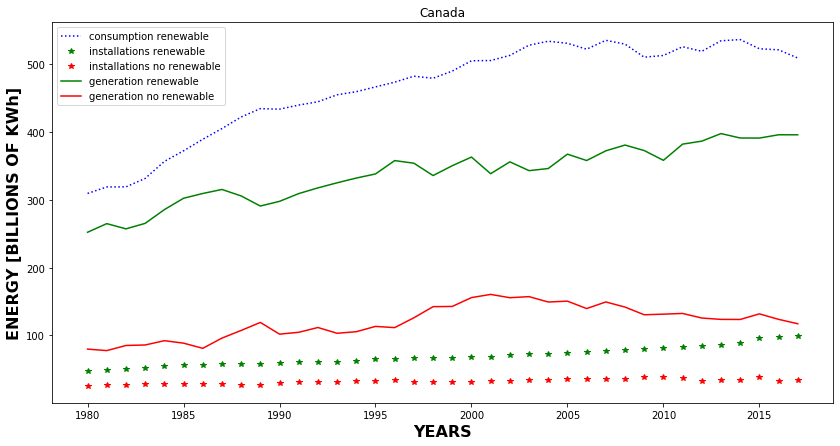

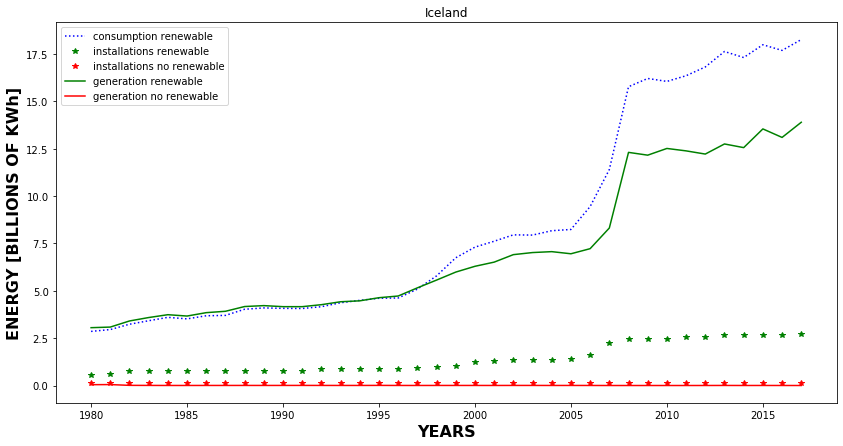

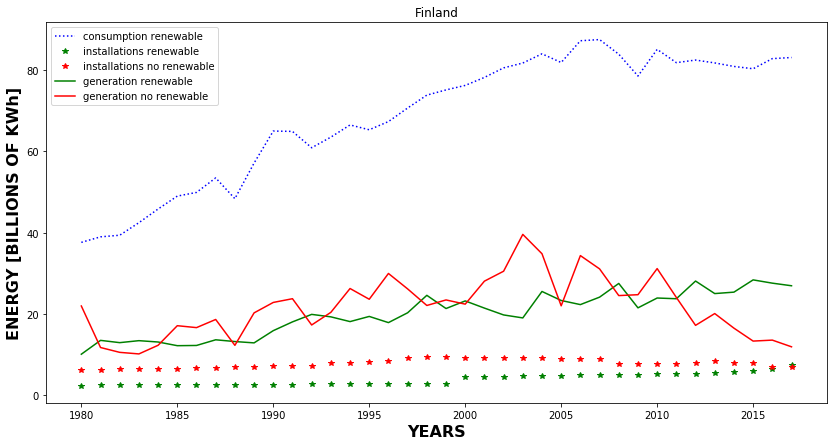

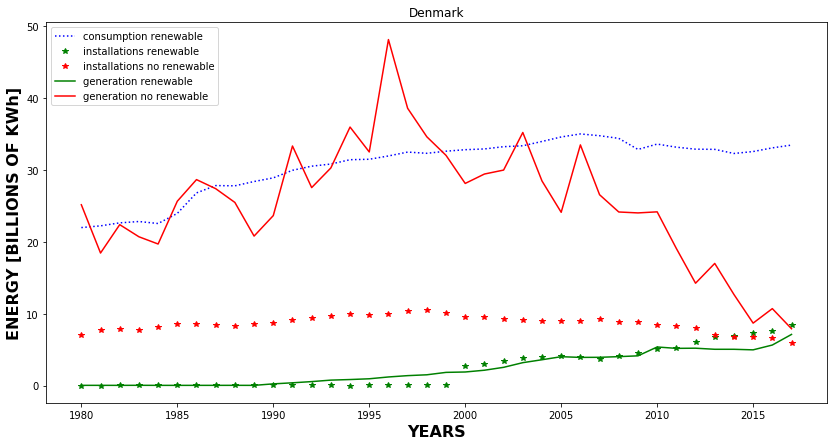

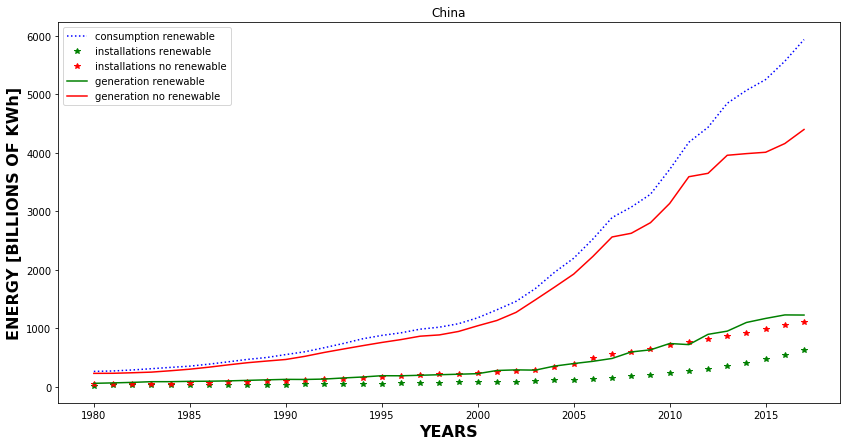

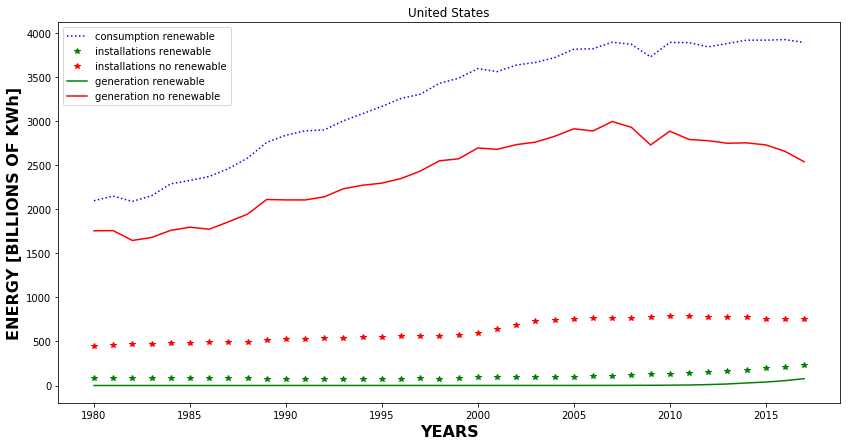

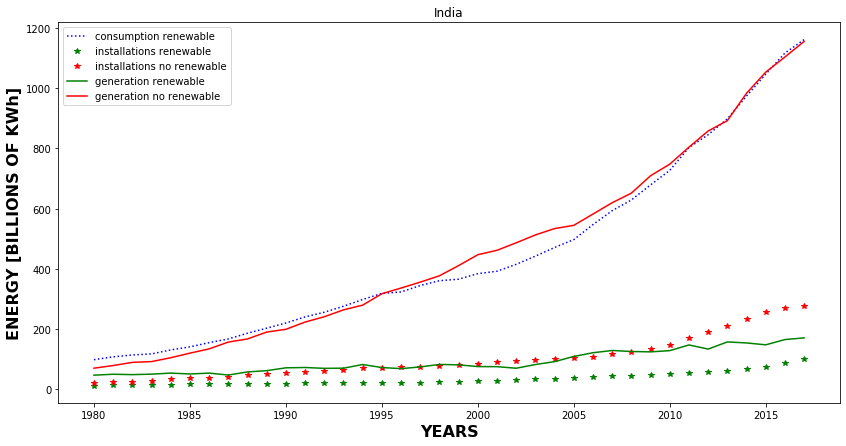

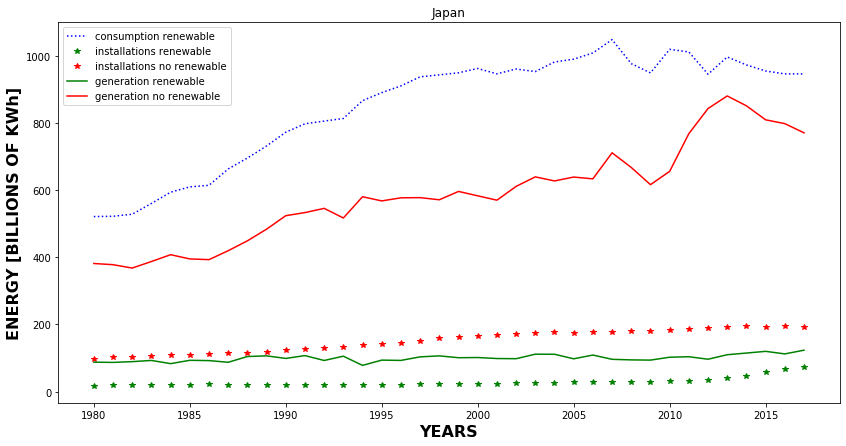

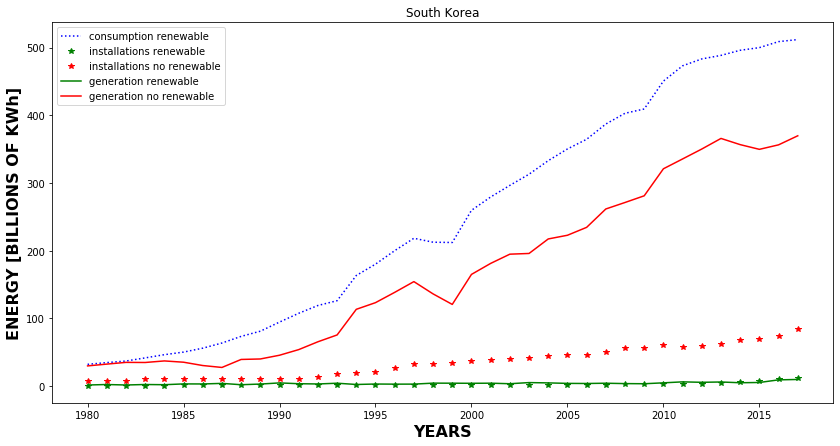

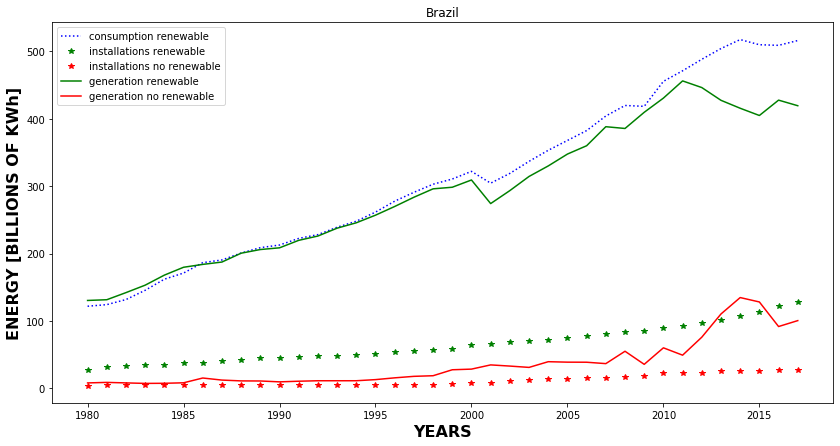

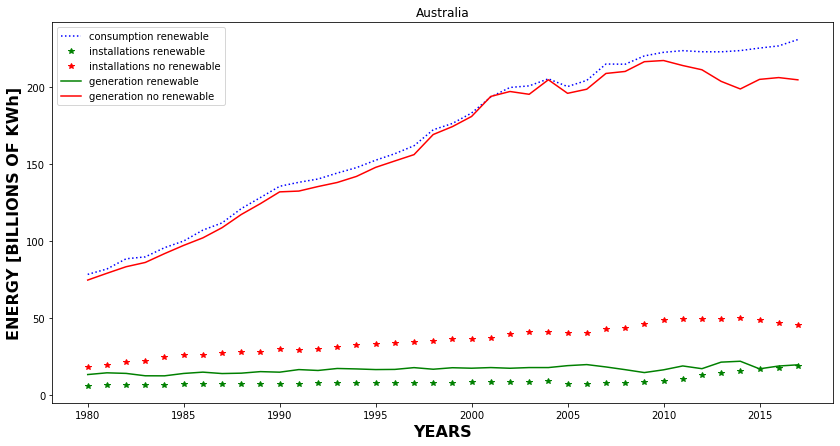

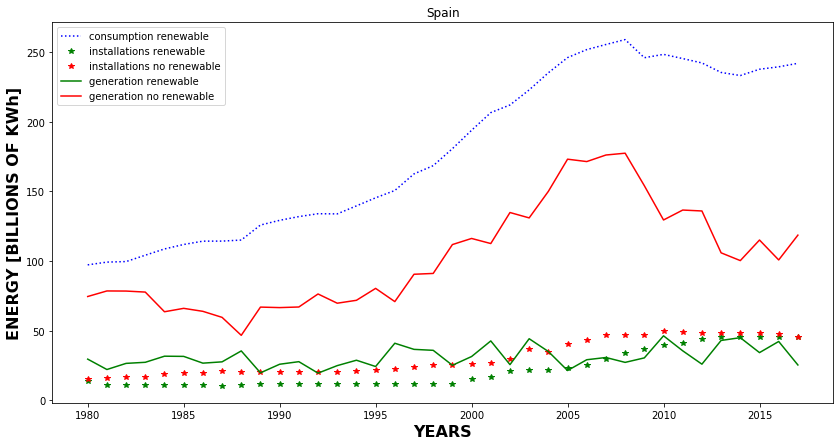

In [3]:
countries= list(['Norway','Canada','Iceland','Finland','Denmark','China','United States','India','Japan','South Korea','Brazil','Australia','Spain'])

t = np.arange(1980,2018,1)

for item in countries:
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,consumption[item:item].T, 'b:', label= 'consumption renewable')
    plt.plot(t,installations_renewable[item:item].T, 'g*', label='installations renewable')
    plt.plot(t,installations_norenewable[item:item].T, 'r*', label='installations no renewable')
    plt.plot(t,generation_renewable[item:item].T, 'g', label='generation renewable')
    plt.plot(t,generation_norenewable[item:item].T, 'r', label='generation no renewable')
    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('ENERGY [BILLIONS OF KWh]',fontsize=16,fontweight='bold')
    plt.title(item)
    fig.savefig(f'../explored_data/plots_countries/{item}.png')

plt.show()


## It can be distinguish two kind of countries: good and bad ones.

## The good countries are where the renewable generation of energy can converge with the net eletricity consumption.

## The bad countries are where the renewable generation of energy is almost impossible to  converge with the net eletricity consumption.

# IMPLEMENTATION IDEA: Through an attribute, system could know if it is worth make the algorithm to predict the sustainability of a country

## Converge feature : 
## Absolute_energic_variation (RE) > Absolute_energic_variation(consumption)
------------------------------------------------------------------------------------------------------------

# 2. Analysis for the *Generation renowable ratio* for all countries (using TABLEAU): 

### Create a 'CLEAN RATIO' that measures the countries which spent more renewable energy from the total consumption

## With this data we show a current pictures of the countries as function of the kind of energy consumped in 2017 as function of total net electricity and population.


In [4]:
GNRE2017 = generation_norenewable[['2017']]
GRE2017 = generation_renewable[['2017']]
consumption2017 = consumption[['2017']]
population2017 = population[['2017']] 
INRE2017 = installations_norenewable[['2017']]
IRE2017 = installations_renewable[['2017']]


#MERGE THE THREE TABLES IN ONE.
difference0 = consumption2017.merge(population2017, how = 'outer',on = 'country',suffixes=('_cons','_RE'))
difference0 = difference0.merge(GRE2017, how = 'outer',on = 'country',suffixes=('_1','_2'))
difference0 = difference0.merge(GNRE2017, how = 'outer',on = 'country',suffixes=('_3','_4'))
difference0 = difference0.merge(IRE2017, how = 'outer',on = 'country',suffixes=('_5','_6'))
ratio = difference0.merge(INRE2017, how = 'outer',on = 'country',suffixes=('_7','_8'))
ratio.rename(columns={'2017_cons':'consumption_2017','2017_RE':'population_2017','2017_3':'gen_renewable_2017','2017_4':'gen_no_renewable_2017','2017_7':'inst_renewable_2017','2017_8':'inst_no_renewable_2017'},inplace=True)

#CREATE FOLLOWING COLUMNS: RATIO CLEAN COUNTRY GENERATION, RATIO CLEAN COUNTRY INSTALLATION, RATIO CONSUMPTION BY POPULATION

ratio['ratio_clean_generation'] = 100*ratio['gen_renewable_2017']/ratio['consumption_2017']
ratio['ratio_clean_installation'] = 100*ratio['inst_renewable_2017']/ratio['consumption_2017']
ratio['ratio_consumption_pop'] = 1000 *ratio['consumption_2017']/ratio['population_2017']
ratio
#DROP THE INITIAL COLUMNS, BECAUSE ARE USELESS TO PROVIDE INFORMATION
ratio.drop('consumption_2017',axis=1,inplace=True)
ratio.drop('gen_renewable_2017',axis=1,inplace=True)
ratio.drop('gen_no_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_no_renewable_2017',axis=1,inplace=True)

ratio.dropna(inplace=True)

In [5]:
ratio.to_csv('../explored_data/ratios.csv')

# 4. Compute the annual variation for consumption of energy (net, renewable and fossil).

## Computing the energetic absolute variation  from 1980

In [15]:
def absolute_variation(s):
    return (s / s[0])  

def relative_variation(s):
    rel = []
    for x in range(0,len(s) - 1):
        if x == 0:
            rel.append(s[0])
        if s.iloc[x]!=0:
            rel.append((s.iloc[x+1]/s.iloc[x]))
        else:
            rel.append(s.iloc[x+1])
    return pd.Series(rel)


###  ENERGETIC RELATIVE VARIATION 

In [37]:
##CONSUMPTION
relative_variation_consumption = consumption.apply(relative_variation,axis=1)
relative_variation_consumption.columns = consumption.columns
relative_variation_consumption.dropna(inplace=True)
relative_variation_consumption.drop('1980',axis=1, inplace=True)
relative_variation_consumption.to_csv('../explored_data/ml_datasets/relative_variation_consumption.csv')


##RENEWABLE GENERATION
relative_variation_renewable = generation_renewable.apply(relative_variation,axis=1)
relative_variation_renewable.columns = consumption.columns
relative_variation_renewable.dropna(inplace=True)
relative_variation_renewable.drop('1980',axis=1, inplace=True)
relative_variation_renewable.to_csv('../explored_data/ml_datasets/relative_variation_renewable.csv')

##NON RENEWABLE GENERATION

relative_variation_norenewable = generation_norenewable.apply(relative_variation,axis=1)
relative_variation_norenewable.columns = consumption.columns
relative_variation_norenewable.dropna(inplace=True)
relative_variation_norenewable.drop('1980',axis=1, inplace=True)
relative_variation_norenewable.to_csv('../explored_data/ml_datasets/relative_variation_norenewable.csv')



###  PLOTS OF RELATIVE ENERGETIC VARIATION FOR SAME COUNTRIES

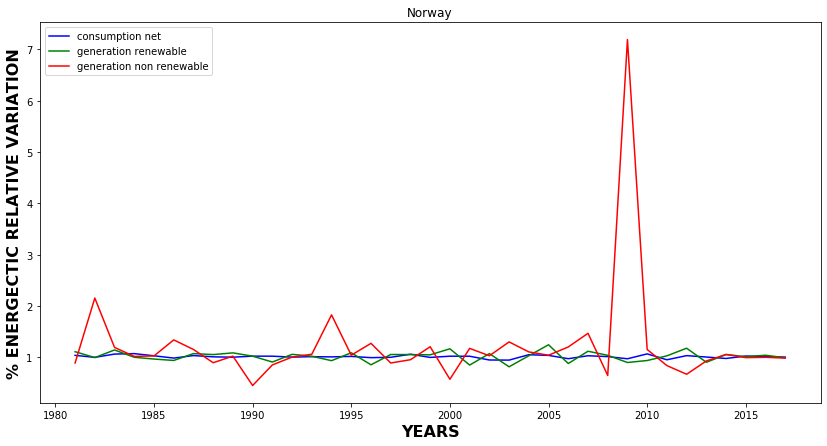

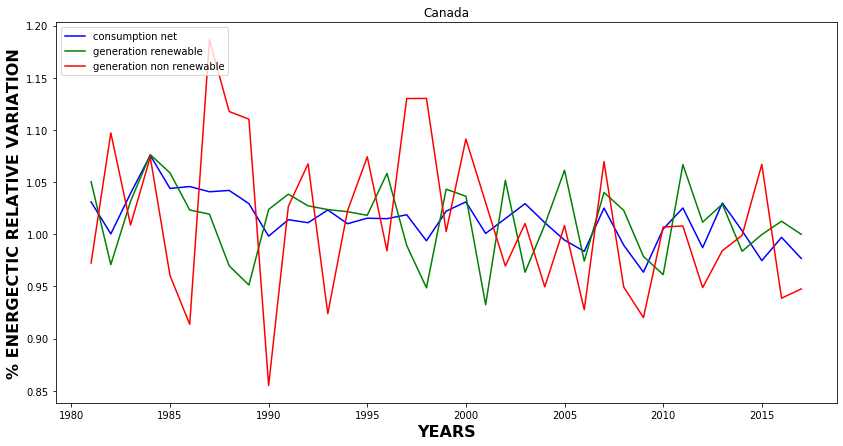

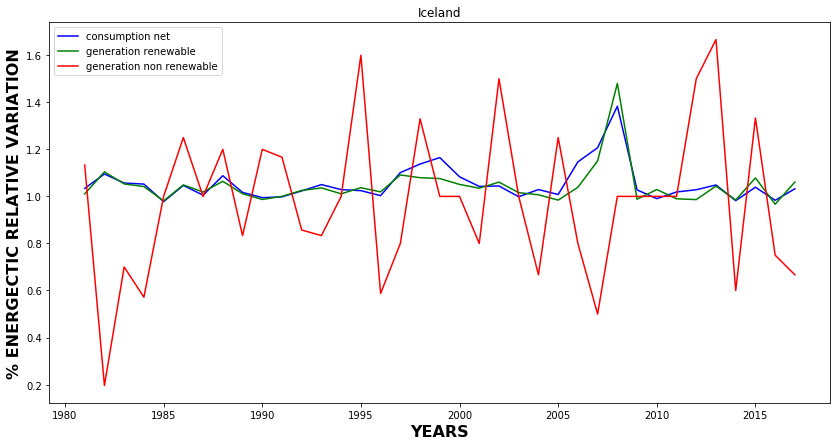

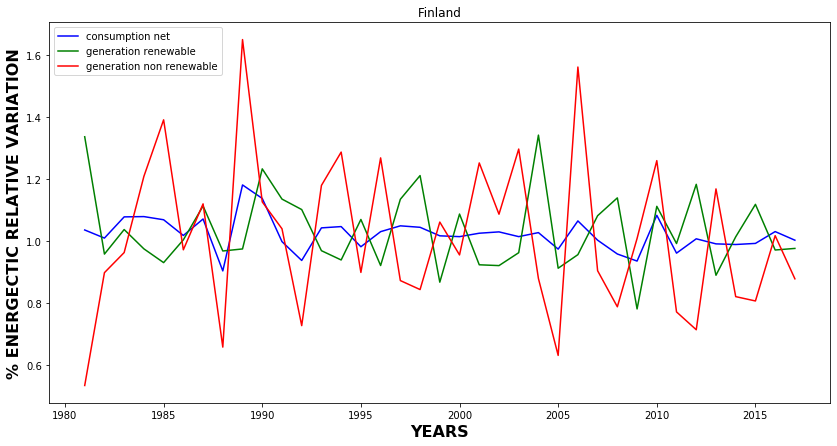

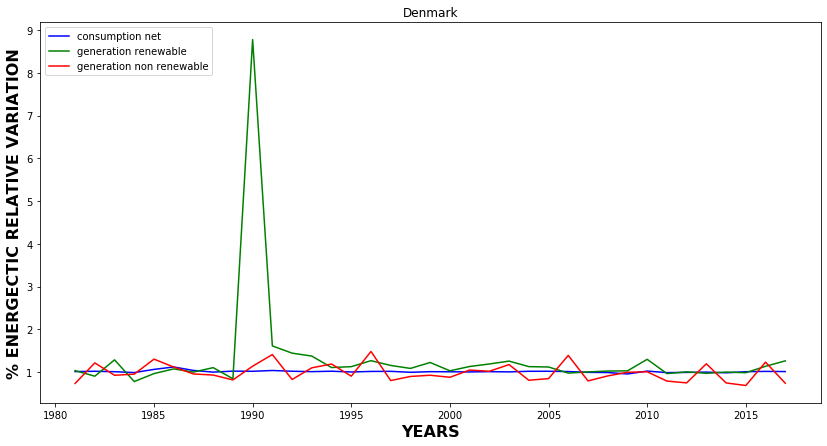

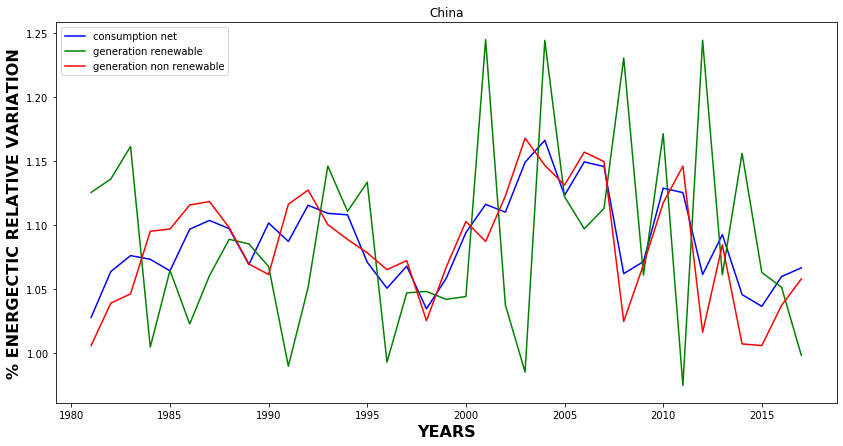

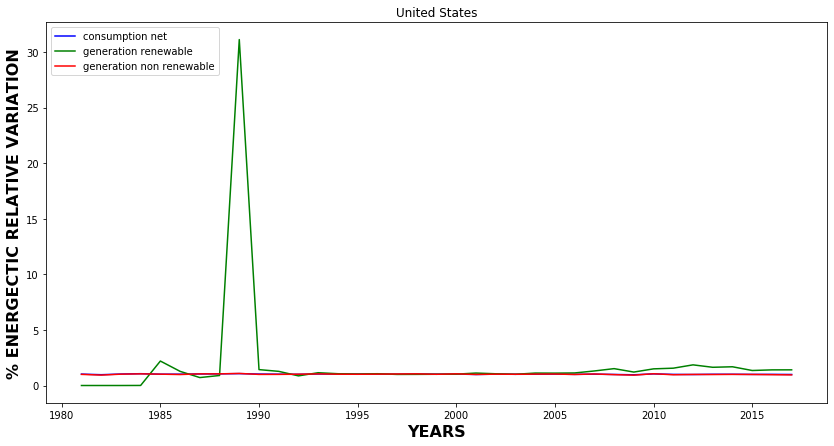

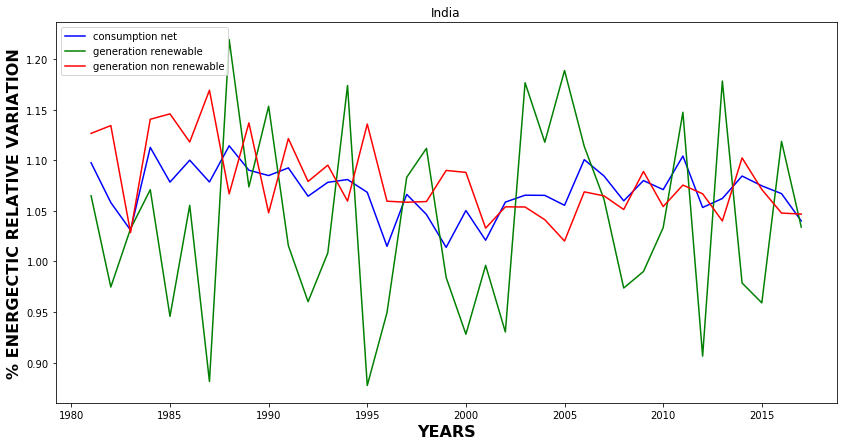

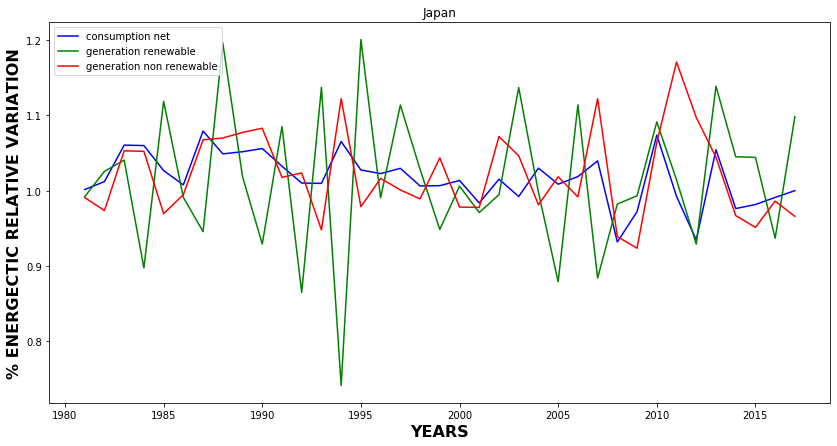

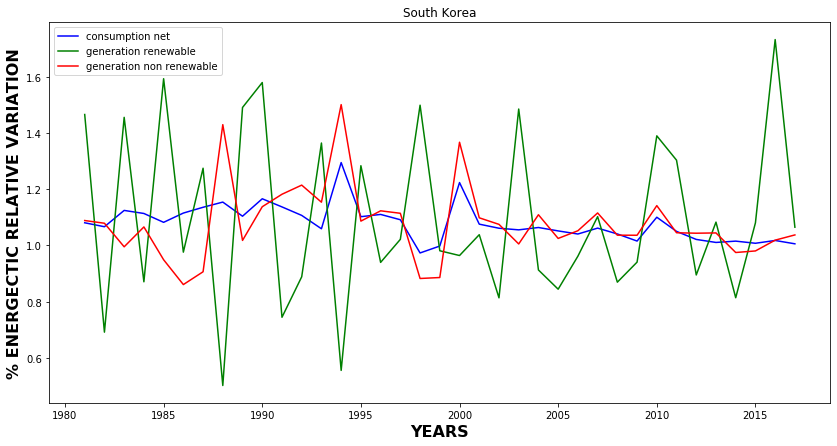

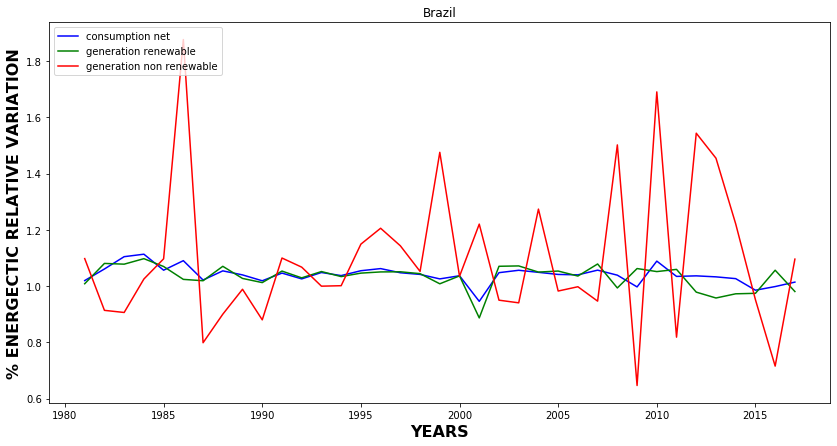

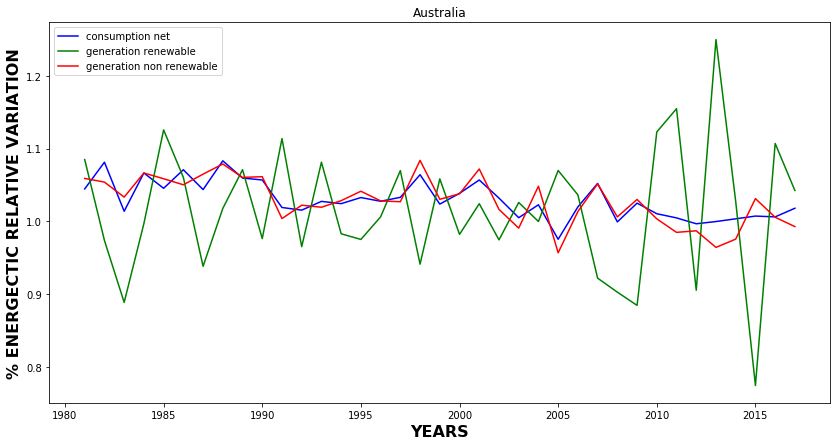

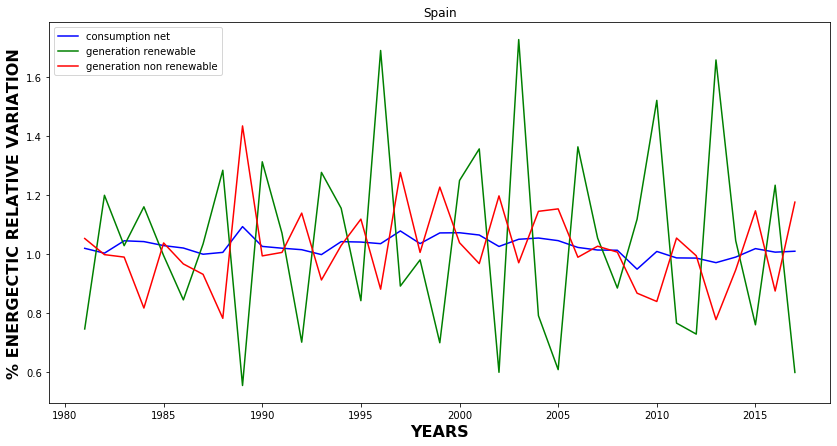

In [33]:
t = np.arange(1981,2018,1)
for item in countries:
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,relative_variation_consumption[item:item].T, 'b', label= 'consumption net')
    plt.plot(t,relative_variation_renewable[item:item].T, 'g', label= 'generation renewable')
    plt.plot(t,relative_variation_norenewable[item:item].T, 'r', label= 'generation non renewable')
    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('% ENERGECTIC RELATIVE VARIATION',fontsize=16,fontweight='bold')
    plt.title(item)
    fig.savefig(f'../explored_data/plots_energetic_relative_variation/{item}.png')
plt.show()
